In [190]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [411]:
def plot_one_image(image: np.ndarray) -> None:
    fig, axs = plt.subplots(1, 1, figsize=(10, 8))
    
    axs.imshow(image)
    axs.axis('off')
    plt.plot()

### Task 2

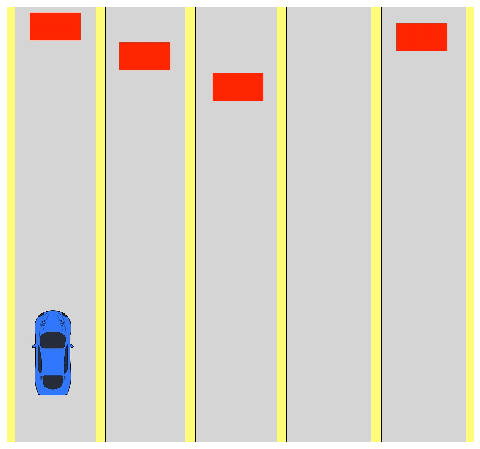

In [412]:
test_image = cv2.imread('task_2/image_01.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)

In [413]:
def what_is(pix):
    if pix[0] > 220 and pix[1] < 180 and pix[2] < 180:
        return 1 #red obstacle
    
    if pix[2] > 220 and pix[1] < 150 and pix[0] < 100:
        return 2 #blue car
    
    if int(pix[0]) - int(pix[2]) > 50:
        return 3 #yellow border

    if np.sum(pix) < 30:
        return 4 #black line
    
    if np.sum(pix)//3 <= 220 and np.sum(pix)//3 >= 200:
        return 0 #grey road [213, 213, 213]
    return -1 #unknown color

def find_road_number(image):
    #determining roads
    roads = []
    on_road = False
    for i in range(image.shape[0]):
        if on_road and what_is(image[0][i]) == 3:
            roads.append(i)
            on_road = False
        if not on_road and what_is(image[0][i]) == 0:
            roads.append(i)
            on_road = True

    roads_number = len(roads)//2
    meancolor = np.zeros((3), dtype=int)
    roads_objects = np.zeros((roads_number,2))
    
    #searching for objects on roads
    for i in range(roads_number):
        center_y = (roads[2*i+1] + roads[2*i])//2
        for j in range(10,image.shape[0]-10):
            for k in range(3):
                b = int(image[j-10:j+10, center_y][:, k].sum()/20)
                if b >= 255: 
                    meancolor[k] = 255
                else:
                    meancolor[k] = b
            if what_is(meancolor) > 0:
                roads_objects[i, what_is(meancolor)-1] = 1
    
    #choosing an empty road
    for i in range(roads_number):
        if np.all(roads_objects[i] == [0, 1]):
            return i #current road is clear
        if np.all(road == [1, 1]):
            break #current road is not clear
    
    for j in range(roads_number):
        if np.all(roads_objects[j] == [0, 0]): return j #a clear road
    return -1 #no clear roads found

In [414]:
road_number = find_road_number(test_image)
print(f'Нужно перестроиться на дорогу номер {road_number}')

Нужно перестроиться на дорогу номер 3
